# TP 2 

In [7]:
# All importation of libraries 
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

Le fichier "villes.csv" comporte 32 villes françaises décrites par les températures moyennes dans les 12 mois de
l’année. L’objectif dans cette partie est de représenter graphiquement le plus d’informations possibles contenues
dans ce fichier de données et de déceler une éventuelle segmentation topologique des villes.

## 1. Importer ce jeu de données avec la librairie pandas (c.f. read_csv)

In [2]:
# 1. Importer ce jeu de données avec la librairie pandas (c.f. read_csv)
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

## 2. Réaliser une Analyse en Composantes Principales (module PCA de Scikit-learn) sur ce jeu de données centrées réduites (StandardScaler)
a) Quel est le nombre d’axes à retenir pour conserver un minimum de 90% de l’information
représentée dans le nuage initial.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Centrer et réduire les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer la PCA
pca = PCA()
pca.fit(X_scaled)

# Variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_

# Trouver le nombre d'axes pour 90% de variance
cumulative_variance = np.cumsum(explained_variance_ratio)
num_axes_90_percent_variance = np.argmax(cumulative_variance >= 0.9) + 1

print(f"Nombre d'axes pour 90% de variance : {num_axes_90_percent_variance}")


Nombre d'axes pour 90% de variance : 2


In [8]:
# Obtenir les deux premiers axes principaux
first_axis = pca.components_[0]
second_axis = pca.components_[1]

print("Interprétation des deux premiers axes principaux :")
print(f"Premier axe : {first_axis}")
print(f"Deuxième axe : {second_axis}")


Interprétation des deux premiers axes principaux :
Premier axe : [0.27151028 0.28846164 0.3010811  0.30354174 0.28353089 0.27841907
 0.27290295 0.28757774 0.30472022 0.3038548  0.29242808 0.2729549 ]
Deuxième axe : [ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
 -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]


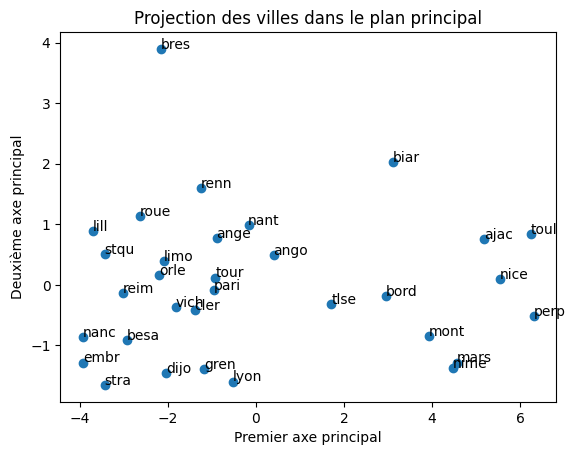

In [9]:
# Appliquer la PCA avec deux composantes
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

# Visualisation graphique
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.xlabel("Premier axe principal")
plt.ylabel("Deuxième axe principal")
plt.title("Projection des villes dans le plan principal")
plt.show()


In [10]:
def perform_pca_and_visualize(data_file):
    # Charger le fichier CSV dans un DataFrame
    data = pd.read_csv(data_file, sep=';')

    # Extraire les températures moyennes pour chaque mois
    X = data.iloc[:, 1:13].values
    labels = data.iloc[:, 0].values

    # Centrer et réduire les

3. Appliquer la fonction précédente sur le jeu de données "crimes.csv". Il s’agit des statistiques de criminalité
dans 50 états américains. Dans chaque état, sept types de crimes ou délits sont repérés par leurs nombres
annuels de faits constatés rapportés sur 100 000 habitants : meurtres (Meurtre), enlèvements (Rapt), vols
avec violence(Vol), agressions (Attaque), viol (Viol), vols peu importants (Larcin), vols de voitures
(Auto_Theft). Interpréter et comparer les résultats obtenus pour ce Jeu de données. Avec les éléments que
vous avez, peut-on visuellement identifier une typologie des individus pour ce jeu de données.


In [15]:
## ans

data = pd.read_csv('./crimes.csv')
X = data.iloc[:, 2:].values  # Exclure la colonne "Population"
labels = data.iloc[:, 0].values  # Noms des états




In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Charger les données
data_crimes = pd.read_csv('crimes.csv')

# 2. Standardiser les données
scaler = StandardScaler()
data_crimes_scaled = scaler.fit_transform(data_crimes.iloc[:, 1:])

# 3. Appliquer l'ACP
pca = PCA()
X_pca_crimes = pca.fit_transform(data_crimes_scaled)

# 4. Déterminer le nombre d'axes à conserver
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()
num_components_to_keep = len(cumulative_variance_ratio[cumulative_variance_ratio <= 0.9])
print("Nombre d'axes à conserver pour 90% de l'information :", num_components_to_keep)

# 5. Interpréter les composantes principales
for i in range(num_components_to_keep):
    print(f"Composante principale {i+1} :")
    for j, (feature, importance) in enumerate(zip(data_crimes.columns[1:], pca.components_[i])):
        print(f"{feature}: {importance:.3f}")
    print()

# 6. Visualiser graphiquement les états projetés dans le plan principal
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_crimes[:, 0], X_pca_crimes[:, 1])
for label, x, y in zip(data_crimes.iloc[:, 0], X_pca_crimes[:, 0], X_pca_crimes[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-5, 5), textcoords='offset points')
plt.title("Projection des états sur le plan principal")
plt.xlabel("Première composante principale")
plt.ylabel("Deuxième composante principale")
plt.show()

# 7. Analyser les positions des états sur le plan projeté
# Vous pouvez interpréter visuellement les regroupements ou les oppositions entre les états sur le plan projeté.

# 8. Identifier une typologie des individus
# Utilisez les résultats de l'ACP et l'analyse des positions des états pour identifier visuellement une typologie des états.


ValueError: at least one array or dtype is required

4. Faire de même pour le fichier "50_Startups.csv" qui comporte 50 startups américaines décrites par leurs
dépenses en termes de R&D, d’administration et de Marketing ainsi que leur Bénéfice annue